In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import NearestNeighbors

## Generate Data without Positivity Violations

We will use the following data generating process for illustration:

- For each $i = 1, \ldots, n$:
    - Sample covariate vector: $\mathbf{X}_i \sim Unif[-1,1]^p$ with $p$ covariates
    - Assign unit $i$'s treatment: $T_i =1$ with prob $\text{expit}(0.5\mathbf{X}_{i,1} + 0.5\mathbf{X}_{i,2})$
    - Generate outcomes: $Y_i = \mu(\mathbf{X}_i, T_i) + \epsilon_i, \epsilon_i \sim \mathcal{N}(0,1)$
        - $\mu(\mathbf{X}_i, T_i) = 10 + \mathbf{X}_{i,1} + 2 * \mathbf{X}_{i,2} + 10 \cdot T_i + \underbrace{10 * \mathbf{X}_{i,2}^2 * T_i}_{\text{Tx Effect Hetero.}}$

In [5]:
def expit(x):
    '''
    The expit function, also known as the logistic function, is defined as expit(x) = 1 / (1 + exp(-x))
    Parameters:
    x (float): A scalar value
    Returns:
    float: The value of the expit function at x
    '''
    return 1 / (1 + np.exp(-x))
def sample_X(n, p):
    '''
    Generates a sample of size `n` from a Uniform distribution with bounds [0,1]
    Parameters:
    n (int): The number of trials or sample size.
    p (float): The number of features
    Returns:
    numpy.ndarray: A n by p matrix
    '''
    return np.random.uniform(-1, 1, (n, p))
    
def make_pi(X):
    '''
    Given a (n by p) dimensional matrix X, construct the propensity score function, P(T = 1 | X = x), for each unit (row) in X
    Parameters:
    X (numpy.ndarray): A n by p matrix
    Returns:
    numpy.ndarray: A n by 1 matrix
    '''
    return expit(0.5 * X[:, 0] + 0.5 * X[:, 1])

def sample_T(X, pi_function = make_pi):
    '''
    Given a (n by p) dimensional matrix X, sample the treatment indicator T for each unit in X
    Parameters:
    X (numpy.ndarray): A n by p matrix
    pi_function (function): A function that takes in a (n by p) dimensional matrix X and returns a (n by 1) dimensional matrix
    Returns:
    numpy.ndarray: A n by 1 matrix
    '''
    return np.random.binomial(1, pi_function(X))

def mu(X, T):
    '''
    Given a (n by p) dimensional matrix X and a (n by 1) dimensional matrix T, compute the conditional mean E[Y | X = x, T = t] for each unit in X
    Parameters:
    X (numpy.ndarray): A n by p matrix
    T (numpy.ndarray): A n by 1 matrix
    Returns:
    numpy.ndarray: A n by 1 matrix
    '''
    return 10 + X[:, 0] + 2 * X[:, 1] + 10 * T + 10 * X[:, 1]**2 * T
    
def sample_Y(X, T):
    '''
    Given a (n by p) dimensional matrix X and a (n by 1) dimensional matrix T, sample the response Y for each unit in X
    Parameters:
    X (numpy.ndarray): A n by p matrix
    T (numpy.ndarray): A n by 1 matrix
    Returns:
    numpy.ndarray: A n by 1 matrix
    '''
    error = np.random.normal(0, 1, X.shape[0])
    return mu(X, T) + error

##### Q: The average treatment effect is defined as $ATE = \mathbb{E}_{(X, T, Y)}[Y(1) - Y(0)]$. What is the ATE in this problem? Answer either analytically (this is easier) or argue by simulation
- Answer:

In [ ]:
### Solution if answering via simulation
ground_truth_ate = 

##### The following plot shows $\mathbf{X}_{\cdot, 1}$ on the x axis, $\mathbf{X}_{\cdot, 2}$ on the y-axis and the true propensity score as a colored background. Is there an overlap violation? (Don't overthink it)
--Answer: 

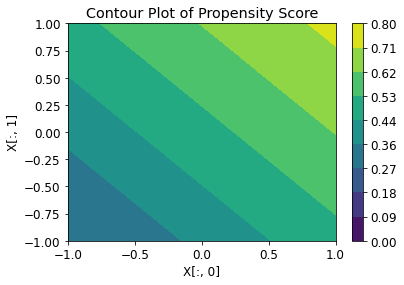

In [6]:
xv = np.linspace(-1, 1, 1000)
yv = np.linspace(-1, 1, 1000)
x_plot = np.array([[x, y] for x in xv for y in yv])
pi_grid_violation = make_pi(x_plot).reshape(1000, 1000)

plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots()
contour = ax.contourf(xv, yv, pi_grid_violation, cmap='viridis', levels=np.linspace(0, 0.8, 10).round(2))
cbar = fig.colorbar(contour, ax=ax)
plt.xlabel('X[:, 0]')
plt.ylabel('X[:, 1]')
plt.title('Contour Plot of Propensity Score')
plt.show()



#### Run 100 monte carlo iterations of the following simulation:
- Sample 1,000 observations with *2* covariates
- Estimate the average treatment effect using 2 different methods (e.g., IPW with logistic regression vs outcome regression with logistic regression)
- Report the bias and variance of your estimate across monte carlo iterations

In [ ]:
def first_ate_estimator(X, T, Y):
    '''
    Given a (n by p) dimensional matrix X, a (n by 1) dimensional matrix T, and a (n by 1) dimensional matrix Y, estimate the Average Treatment Effect (ATE)

    Parameters:
    X (numpy.ndarray): A n by p matrix
    T (numpy.ndarray): A n by 1 matrix
    Y (numpy.ndarray): A n by 1 matrix

    Returns:
    float: The estimated Average Treatment Effect (ATE)
    '''
    ## code goes here
    return ate_estimate

def second_ate_estimator(X, T, Y):
    '''
    Given a (n by p) dimensional matrix X, a (n by 1) dimensional matrix T, and a (n by 1) dimensional matrix Y, estimate the Average Treatment Effect (ATE)

    Parameters:
    X (numpy.ndarray): A n by p matrix
    T (numpy.ndarray): A n by 1 matrix
    Y (numpy.ndarray): A n by 1 matrix

    Returns:
    float: The estimated Average Treatment Effect (ATE)
    '''
    ## code goes here
    return ate_estimate

def monte_carlo(n, p, seed):
    """
    Perform a Monte Carlo simulation to estimate the Average Treatment Effect (ATE) using 2 different estimators.
    Parameters:
    n (int): The number of samples.
    p (int): The number of features.
    Returns:
    float: The estimated Average Treatment Effect (ATE).
    """
    np.random.seed(seed)
    # sample X, T, and Y
    X = sample_X(n, p)
    T = sample_T(X)
    Y = sample_Y(X, T)

    # estimate the ATE using estimator of your choice here
    ate_estimate_1 = first_ate_estimator(X, T, Y)

    # estimate the ATE using another estimator of your choice here
    
    ate_estimate_2 = second_ate_estimator(X, T, Y)


    return ate_estimate_1, ate_estimate_2

monte_carlo_ests = np.array([monte_carlo(10000, 2, i) for i in tqdm(range(100))])


In [ ]:
plt.axvline(x=ground_truth_ate, color='red', linestyle='--')
plt.hist(monte_carlo_ests[:, 0], bins=30, edgecolor='black')
plt.xlabel('ATE Estimates')
plt.ylabel('Frequency')
plt.title('Histogram of Monte Carlo ATE Estimates from 1st Estimator')
plt.show()

plt.axvline(x=ground_truth_ate, color='red', linestyle='--')
plt.hist(monte_carlo_ests[:, 1], bins=30, edgecolor='black')
plt.xlabel('ATE Estimates')
plt.ylabel('Frequency')
plt.title('Histogram of Monte Carlo ATE Estimates from 2nd Estimator')
plt.show()

In [ ]:

estimator1_bias = (monte_carlo_ests[:, 0] - ground_truth_ate).mean()
estimator1_variance = np.var(monte_carlo_ests[:, 0])

print('Bias for 1st Estimator:', estimator1_bias)
print('Variance for 1st Estimator:', estimator1_variance)


estimator2_bias = (monte_carlo_ests[:, 1] - ground_truth_ate).mean()
estimator2_variance = np.var(monte_carlo_ests[:, 1])

print('Bias for 2nd Estimator:', estimator2_bias)
print('Variance for 2nd Estimator:', estimator2_variance)

##### Now, let's introduce some overlap violations. Introduce a new propensity score function so that if $\mathbf{X}_{i,1} \leq -0.5 \land \mathbf{X}_{i,2} \leq -0.5$, then $\pi(\mathbf{X}_i) = 0$. In other words, the unit is _guaranteed_ to be in the control group if it is in the bottom left corner of the covariate space

- $T_i =1$ with prob $\text{expit}(0.5\mathbf{X}_{i,1} + 0.5\mathbf{X}_{i,2}) * [ \mathbf{1}_{\mathbf{X}_{i,1} \geq -0.5} + \mathbf{1}_{\mathbf{X}_{i,2} \geq -0.5}]$

In [ ]:
def make_pi_violation(X):
    '''
    Given a (n by p) dimensional matrix X, construct the propensity score function, P(T = 1 | X = x), for each unit (row) in X with overlap violation in bottom left corner
    Parameters:
    X (numpy.ndarray): A n by p matrix
    Returns:
    numpy.ndarray: A n by 1 matrix
    '''

    return expit(0.5 * X[:, 0] + 0.5 * X[:, 1]) * ((X[:, 0] >= -0.5) + (X[:, 1] >= -0.5))


##### Also compute the average treatment effect for the _overlap_ population:
$$\tau^O = \mathbb{E}_{(X, T, Y)}[Y(1) - Y(0) \mid \mathbf{X}_{i,1} \geq -0.5 \text{ or } \mathbf{X}_{i,2} \geq -0.5]$$
-- Answer

In [ ]:
### Solution
ground_truth_ateO = 

print('ATE for overlap group:', ground_truth_ateO)

##### Create the following plot: $\mathbf{X}_{\cdot, 1}$ on the x axis, $\mathbf{X}_{\cdot, 2}$ on the y-axis and the _new_ propensity score as a colored background

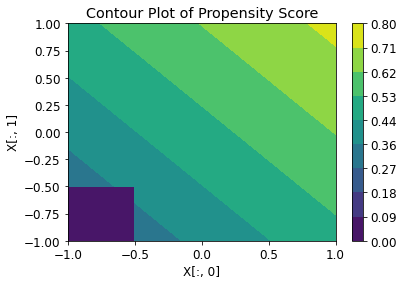

In [12]:

xv = np.linspace(-1, 1, 1000)
yv = np.linspace(-1, 1, 1000)
x_plot = np.array([[x, y] for x in xv for y in yv])
pi_grid_violation = make_pi_violation(x_plot).reshape(1000, 1000)

plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots()
contour = ax.contourf(xv, yv, pi_grid_violation, cmap='viridis', levels=np.linspace(0, 0.8, 10).round(2))
cbar = fig.colorbar(contour, ax=ax)
plt.xlabel('X[:, 0]')
plt.ylabel('X[:, 1]')
plt.title('Contour Plot of Propensity Score')
plt.show()



#### Run 100 monte carlo iterations of the following simulation:
- Sample 1,000 observations with *2* covariates and the _new_ propensity score function with the overlap violation
- Estimate the average treatment effect using 2 different methods (e.g., IPW with logistic regression vs outcome regression with logistic regression)
- Report the bias and variance of your estimate across monte carlo iterations

In [ ]:

def monte_carlo_violation(n, p, seed):
    """
    Perform a Monte Carlo simulation to estimate the Average Treatment Effect (ATE) using inverse propensity weighting and outcome regression with violation PS.
    Parameters:
    n (int): The number of samples.
    p (int): The number of features.
    Returns:
    float: The estimated Average Treatment Effect (ATE).
    """
    np.random.seed(seed)
    # sample X, T, and Y
    X = sample_X(n, p)
    T = sample_T(X, pi_function = make_pi_violation)
    Y = sample_Y(X, T)

    # estimate the ATE using IPW
    ate_estimate1 = first_ate_estimator(X, T, Y)

    # estimate the ATE using outcome regression T learner
    
    ate_estimate2 = first_ate_estimator(X, T, Y)


    return ate_estimate1, ate_estimate2

monte_carlo_ests_violation = np.array([monte_carlo_violation(10000, 2, i) for i in tqdm(range(100))])

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))

ax[0].axvline(x=ground_truth_ateO, color='black', linestyle='--', label = 'Ground truth ATE for Overlap Region')
ax[0].axvline(x=ground_truth_ate, color='red', linestyle='--', label = 'Ground truth ATE')
ax[0].hist(monte_carlo_ests_violation[:, 0], bins=30, edgecolor='black')
ax[0].set_xlabel('ATE Estimates')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Estimator 1')

ax[1].axvline(x=ground_truth_ateO, color='black', linestyle='--', label = 'Ground truth ATE for Overlap Region')
ax[1].axvline(x=ground_truth_ate, color='red', linestyle='--', label = 'Ground truth ATE')
ax[1].hist(monte_carlo_ests_violation[:, 1], bins=30, edgecolor='black')
ax[1].set_xlabel('ATE Estimates')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Estimator 2')

plt.legend()
plt.show()

In [ ]:

viol_estimator1_bias = (monte_carlo_ests_violation[:, 0] - ground_truth_ate).mean()
viol_estimator1_variance = np.var(monte_carlo_ests_violation[:, 0])

print('Bias Estimator 1:', viol_estimator1_bias)
print('Variance Estimator 1:', viol_estimator1_variance)


viol_estimator2_bias = (monte_carlo_ests_violation[:, 1] - ground_truth_ate).mean()
viol_estimator2_variance = np.var(monte_carlo_ests_violation[:, 1])

print('Bias Estimator 2:', viol_estimator2_bias)
print('Variance Estimator 2:', viol_estimator2_variance)

##### Now, let us implement some of these solutions we discussed. We will implement (1) propensity score trimming and (2) pruning via matching. 
- First, implement a generic trimming function that indicates whether we will include an observation in the analysis based on its estimated propensity score
- Now, estimate propensity scores using a logistic regression and using a random forest
- Trim observations whose estimated propensity scores are outside of the 0.1 to 0.9 range. On our contour plot, overlay whether observations were pruned (red) or kept in the analysis (blue) for a single monte carlo iteration of data generation

In [ ]:
def ps_trimming(X_train, X_test, T_train, T_test, Y_train, Y_test, ps_estimator):
    """
    Perform propensity score trimming to remove units with low propensity scores.
    
    Parameters:
    - X_train (pd.DataFrame or np.array): Covariates for training.
    - X_test (pd.DataFrame or np.array): Covariates for testing.
    - T_train (pd.Series or np.array): Treatment indicator for training.
    - T_test (pd.Series or np.array): Treatment indicator for testing.
    - Y_train (pd.Series or np.array): Outcome values for training.
    - Y_test (pd.Series or np.array): Outcome values for testing.
    - ps_estimator: Scikit-learn compatible classifier for propensity score estimation.
    
    Returns:
    - X_trim (pd.DataFrame or np.array): Trimmed covariates.
    - T_trim (pd.Series or np.array): Trimmed treatment indicator.
    - Y_trim (pd.Series or np.array): Trimmed observed outcome values.
    """
    
    # Step 1: Estimate propensity scores
    

    # Step 2: Trim data based on propensity scores
    
    # Step 3: Return trim ID
    return keep_idx

In [ ]:
X = sample_X(2500, 2)
T = sample_T(X, pi_function=make_pi_violation)
Y = sample_Y(X, T)

## Split data into training and testing
X_train, X_test, T_train, T_test, Y_train, Y_test = train_test_split(X, T, Y, test_size=0.5, random_state=42)

true_ps_trim_idx = make_pi_violation(X_test) > 0
logit_ps_trim_idx = ps_trimming(X_train, X_test, T_train, T_test, Y_train, Y_test, ps_estimator = LogisticRegression())
rf_ps_trim_idx = ps_trimming(X_train, X_test, T_train, T_test, Y_train, Y_test, ps_estimator = RandomForestClassifier())

In [ ]:
def plot_subaxis_ps_viol(ax, ps_trim, title):
    contour = ax.contourf(xv, yv, pi_grid_violation, cmap='viridis', levels=np.linspace(0, 0.8, 10).round(2))
    ax.scatter(X_test[:, 0], X_test[:, 1], color=['#00A2FF' if idx == 1 else 'red' for idx in ps_trim], s=10)
    ax.set_xlabel('X[:, 0]')
    # ax.set_ylabel('X[:, 1]')
    ax.set_title(title)

xv = np.linspace(-1, 1, 1000)
yv = np.linspace(-1, 1, 1000)
x_plot = np.array([[x, y] for x in xv for y in yv])
pi_grid_violation = make_pi_violation(x_plot).reshape(1000, 1000)

plt.rcParams.update({'font.size': 12})
n_subplots = 3
fig, ax = plt.subplots(1, n_subplots, figsize=(n_subplots * 4 + 1, 4))

plot_subaxis_ps_viol(ax[0], true_ps_trim_idx, 'True PS Trim')
ax[0].set_ylabel('X[:, 0]')
plot_subaxis_ps_viol(ax[1], logit_ps_trim_idx, 'Logit Trim')
plot_subaxis_ps_viol(ax[2], rf_ps_trim_idx, 'RF Trim')

cbar = fig.colorbar(contour)

plt.show()



##### What do you notice about the behavior of the different trimmers? How does logistic regression propensity score trimmer compare to the random forest trimmer? Why might this be the case? (Hint: think about overfitting/underfitting)

Answer goes here

##### Now, implement the matching procedure
- For the treated units, find the nearest control neighbor
- For the control units, find the nearest treated neighbor
- Flag any observations whose distance is >75th-quantile + 1.5 * (Interquartile range)

In [ ]:
def matching_trimmer(X_train, X_test, T_train, T_test, Y_train, Y_test):
    """
    Perform matching-based trimming to remove units with low propensity scores.
    
    Parameters:
    - X (pd.DataFrame or np.array): Covariates.
    - T (pd.Series or np.array): Treatment indicator.
    
    Returns:
    - keep_idx (pd.Series or np.array): Trimmed indices.
    """
    # Step 1: Separate treated and control units (to be fair to baselines, only use test data)
    X_tx = X_test[T_test == 1]
    X_ctrl = X_test[T_test == 0]

    # Step 2: find distance to nearest neighbor of treated class for every observation
    tx_distances = 
    # Step 3: find distance to nearest neighbor of control class for every observation
    ctrl_distances = 
    # Step 4: keep only distance to nearest neighbor of the _opposite_ class
    distances = tx_distances * (1 - T_test) + ctrl_distances * T_test

    # Step 5: find outlier distances using interquartile range
    outlier_threshold = 

    # Step 6: keep only non-outliers
    keep_idx = distances < outlier_threshold

    return keep_idx

In [196]:
matching_trim_idx = matching_trimmer(X_train, X_test, T_train, T_test, Y_train, Y_test)

In [ ]:

xv = np.linspace(-1, 1, 1000)
yv = np.linspace(-1, 1, 1000)
x_plot = np.array([[x, y] for x in xv for y in yv])
pi_grid_violation = make_pi_violation(x_plot).reshape(1000, 1000)

plt.rcParams.update({'font.size': 12})
n_subplots = 4
fig, ax = plt.subplots(1, n_subplots, figsize=(n_subplots * 4 + 1, 4))
plot_subaxis_ps_viol(ax[0], true_ps_trim_idx, 'True PS Trim')
ax[0].set_ylabel('X[:, 0]')
plot_subaxis_ps_viol(ax[1], logit_ps_trim_idx, 'Logit Trim')
plot_subaxis_ps_viol(ax[2], rf_ps_trim_idx, 'RF Trim')

cbar = fig.colorbar(contour)

plot_subaxis_ps_viol(ax[3], matching_trim_idx, 'Matching Trim')
plt.show()

##### Now, let us implement a Monte Carlo experiment to evaluate how trimming with different choices of estimators affects ATE and ATEO estimates

In [ ]:
def ateO_monte_carlo(n, p, seed):
    """
    Perform a Monte Carlo simulation to estimate the Average Treatment Effect (ATE) using inverse propensity weighting and outcome regression with violation PS.
    Parameters:
    n (int): The number of samples.
    p (int): The number of features.
    Returns:
    float: The estimated Average Treatment Effect (ATE).
    """
    np.random.seed(seed)
    # sample X, T, and Y
    X = sample_X(n, p)
    T = sample_T(X, pi_function=make_pi_violation)
    Y = sample_Y(X, T)

    # split into training (for finding overlap violations) and testing data
    X_train, X_test, T_train, T_test, Y_train, Y_test = train_test_split(X, T, Y, test_size=0.5, random_state=42)

    # implement propensity score trimming with logistic regression and find out which observations we can keep/remove
    logit_ps_keep_idx = ps_trimming(X_train, X_test, T_train, T_test, Y_train, Y_test, ps_estimator = LogisticRegression())

    # implement propensity score trimming with random forest and find out which observations we can keep/remove
    rf_ps_keep_idx = ps_trimming(X_train, X_test, T_train, T_test, Y_train, Y_test, ps_estimator = RandomForestClassifier())

    # estimate the ATE using your first estimator on the untrimmed data from logistic regression PS estimates
    ate_estimate1_logit_trim = first_ate_estimator(X[logit_ps_keep_idx, :], T[logit_ps_keep_idx], Y[logit_ps_keep_idx])

    # estimate the ATE using your first estimator on the untrimmed data from random forest PS estimates
    ate_estimate1_rf_trim = first_ate_estimator(X[rf_ps_keep_idx, :], T[rf_ps_keep_idx], Y[rf_ps_keep_idx])
    
    # estimate the ATE using your second estimator on the untrimmed data from logistic regression PS estimates
    ate_estimate2_logit_trim = second_ate_estimator(X[logit_ps_keep_idx, :], T[logit_ps_keep_idx], Y[logit_ps_keep_idx])

    # estimate the ATE using your second estimator on the untrimmed data from random forest PS estimates
    ate_estimate2_rf_trim = second_ate_estimator(X[rf_ps_keep_idx, :], T[rf_ps_keep_idx], Y[rf_ps_keep_idx])


    return ate_estimate1_logit_trim, ate_estimate1_rf_trim, ate_estimate2_logit_trim, ate_estimate2_rf_trim

In [ ]:
ateO_monte_carlo_ests = np.array([ateO_monte_carlo(10000, 2, i) for i in tqdm(range(100))])

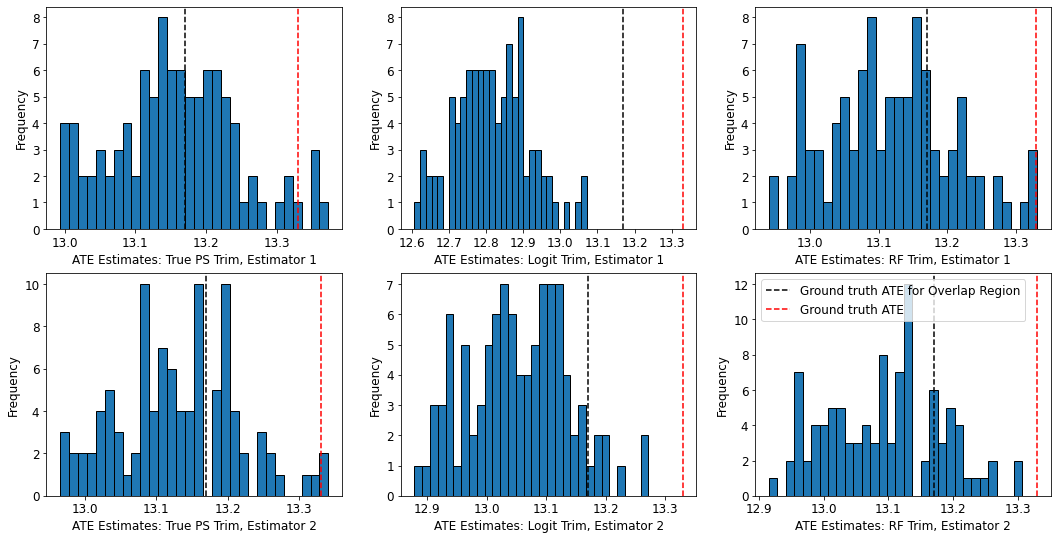

In [ ]:
fig, ax = plt.subplots(2, 3, figsize = (18, 9))

ax[0,0].axvline(x=ground_truth_ateO, color='black', linestyle='--', label = 'Ground truth ATE for Overlap Region')
ax[0,0].axvline(x=ground_truth_ate, color='red', linestyle='--', label = 'Ground truth ATE')
ax[0,0].hist(ateO_monte_carlo_ests[:, 0], bins=30, edgecolor='black')
ax[0,0].set_xlabel('ATE Estimates: True PS Trim, Estimator 1')
ax[0,0].set_ylabel('Frequency')

ax[0,1].axvline(x=ground_truth_ateO, color='black', linestyle='--', label = 'Ground truth ATE for Overlap Region')
ax[0,1].axvline(x=ground_truth_ate, color='red', linestyle='--', label = 'Ground truth ATE')
ax[0,1].hist(ateO_monte_carlo_ests[:, 1], bins=30, edgecolor='black')
ax[0,1].set_xlabel('ATE Estimates: Logit Trim, Estimator 1')
ax[0,1].set_ylabel('Frequency')

ax[0,2].axvline(x=ground_truth_ateO, color='black', linestyle='--', label = 'Ground truth ATE for Overlap Region')
ax[0,2].axvline(x=ground_truth_ate, color='red', linestyle='--', label = 'Ground truth ATE')
ax[0,2].hist(ateO_monte_carlo_ests[:, 2], bins=30, edgecolor='black')
ax[0,2].set_xlabel('ATE Estimates: RF Trim, Estimator 1')
ax[0,2].set_ylabel('Frequency')

ax[1,0].axvline(x=ground_truth_ateO, color='black', linestyle='--', label = 'Ground truth ATE for Overlap Region')
ax[1,0].axvline(x=ground_truth_ate, color='red', linestyle='--', label = 'Ground truth ATE')
ax[1,0].hist(ateO_monte_carlo_ests[:, 3], bins=30, edgecolor='black')
ax[1,0].set_xlabel('ATE Estimates: True PS Trim, Estimator 2')
ax[1,0].set_ylabel('Frequency')

ax[1,1].axvline(x=ground_truth_ateO, color='black', linestyle='--', label = 'Ground truth ATE for Overlap Region')
ax[1,1].axvline(x=ground_truth_ate, color='red', linestyle='--', label = 'Ground truth ATE')
ax[1,1].hist(ateO_monte_carlo_ests[:, 4], bins=30, edgecolor='black')
ax[1,1].set_xlabel('ATE Estimates: Logit Trim, Estimator 2')
ax[1,1].set_ylabel('Frequency')

ax[1,2].axvline(x=ground_truth_ateO, color='black', linestyle='--', label = 'Ground truth ATE for Overlap Region')
ax[1,2].axvline(x=ground_truth_ate, color='red', linestyle='--', label = 'Ground truth ATE')
ax[1,2].hist(ateO_monte_carlo_ests[:, 5], bins=30, edgecolor='black')
ax[1,2].set_xlabel('ATE Estimates: RF Trim, Estimator 2')
ax[1,2].set_ylabel('Frequency')


plt.legend()
plt.show()